# Minimum Spanning Tree (MST)

## Introduction

Network analysis can provide interesting insights into the dynamics of the market, and the continually changing behaviour. A Minimum Spanning Tree (MST) is a useful method of analyzing complex networks, for aspects such as risk management, portfolio design, and trading strategies. For example Onnela et al. (2003) notices that the optimal Markowitz portfolio is found at the outskirts of the tree [[4]](https://www.researchgate.net/publication/8952753_Dynamics_of_Market_Correlations_Taxonomy_and_Portfolio_Analysis). Analysing the Tree structure, as a representation of the market, can give us an idea about the stability and state of the market.


A Minimum Spanning Tree (MST) is a graph consisting of the fewest number of edges needed for all nodes to be connected by some path - where the combination of edge weights sum to the smallest total possible. 

MST strongly shrinks during a stock crisis [[2]](https://arxiv.org/abs/1703.00485). Properties such as skewness are positive during times of market crises (such as 1987, early 2000's and 2008) and skewness and kurtosis have stabilised after 2000's [[1]](https://www.sciencedirect.com/science/article/pii/S0960077916303344). Analysing the Tree structure, as a representation of the market, can give us an idea about the stability and state of the market and predict how volatility shocks will propagate through a network. 

## Creating MST Visualisations 

Visualisations are created using Plotly’s Dash, which creates a mini Flask server to serve the frontend components. This section gives examples of how to create and run the MST visualisations, and examples of optional functionality such as adding colours to represent industry and node size to represent, for example market cap. 

In [1]:
import pandas as pd
import numpy as np

# Import Visualisations method
from mlfinlab.networks.visualisations import generate_mst_server

## Import and Prepare Data
ETF pricing data is from 2008-01-02 until 2016-07-01 is used. First we import the csv as a dataframe and set the Date as the dataframe index. 

In [2]:
# Import Data
input_dataframe = pd.read_csv('../Sample-Data/stock_prices.csv', index_col=False)
# Set Date as index
input_dataframe.set_index("Date", inplace = True) 
input_dataframe

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,49.273335,35.389999,106.639999,52.919998,78.220001,87.629997,37.939999,47.759998,41.299999,79.500000,...,42.090000,51.173328,55.983330,74.529999,67.309998,144.929993,94.379997,77.360001,101.400002,130.630005
2008-01-03,49.716667,35.290001,107.000000,53.119999,78.349998,87.809998,37.919998,48.060001,42.049999,80.440002,...,42.029999,51.293331,55.599998,74.800003,67.500000,144.860001,94.250000,77.459999,101.519997,130.740005
2008-01-04,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000,...,42.349998,49.849998,54.536671,72.980003,65.769997,141.309998,94.269997,77.550003,101.650002,128.169998
2008-01-07,48.576668,34.630001,106.949997,51.439999,76.650002,88.199997,37.259998,47.060001,40.220001,77.199997,...,43.230000,50.416672,56.116669,72.949997,65.650002,141.190002,94.680000,77.570000,101.720001,128.059998
2008-01-08,48.200001,34.389999,107.029999,51.320000,76.220001,88.389999,36.970001,46.400002,39.599998,75.849998,...,43.240002,49.566669,55.326672,72.400002,65.360001,138.910004,94.570000,77.650002,101.739998,125.849998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,32.230000,22.920000,116.120003,45.119999,52.630001,113.180000,21.389999,27.980000,44.470001,64.639999,...,51.029999,37.000000,32.380001,43.320000,53.820000,199.600006,139.169998,84.120003,105.790001,171.199997
2016-06-28,33.180000,23.389999,116.519997,45.799999,54.009998,113.160004,22.040001,29.180000,44.849998,66.440002,...,51.220001,37.950001,33.160000,44.740002,54.930000,203.199997,139.460007,84.220001,105.889999,173.820007
2016-06-29,34.020000,23.709999,116.449997,46.400002,55.000000,112.699997,22.430000,29.940001,45.610001,67.699997,...,51.360001,38.540001,33.759998,45.650002,55.669998,206.660004,138.389999,84.190002,105.940002,176.639999


Then we calculate the log returns dataframe and remove the first row (which would be a row of NaNs). 

In [3]:
# Calculate log returns
input_dataframe = np.log(input_dataframe).diff()
# Remove first row of NaNs
log_return_df = input_dataframe.iloc[1:] 
log_return_df

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,0.008957,-0.002830,0.003370,0.003772,0.001661,0.002052,-0.000527,0.006262,0.017997,0.011755,...,-0.001427,0.002342,-0.006871,0.003616,0.002819,-0.000483,-0.001378,0.001292,0.001183,0.000842
2008-01-04,-0.030497,-0.019746,-0.000280,-0.025936,-0.022981,0.002616,-0.024831,-0.024006,-0.030668,-0.037234,...,0.007585,-0.028542,-0.019310,-0.024632,-0.025964,-0.024812,0.000212,0.001161,0.001280,-0.019853
2008-01-07,0.007300,0.000867,-0.000187,-0.006202,0.001044,0.001816,0.007273,0.002979,-0.013827,-0.003879,...,0.020566,0.011303,0.028560,-0.000411,-0.001826,-0.000850,0.004340,0.000258,0.000688,-0.000859
2008-01-08,-0.007784,-0.006955,0.000748,-0.002336,-0.005626,0.002152,-0.007814,-0.014124,-0.015535,-0.017642,...,0.000231,-0.017003,-0.014178,-0.007568,-0.004427,-0.016280,-0.001162,0.001031,0.000197,-0.017408
2008-01-09,0.032254,0.003194,-0.000748,0.021589,0.007190,-0.001585,0.002971,0.000431,0.006293,0.013098,...,0.010811,0.019249,0.060887,0.001380,0.021044,0.010455,0.001902,-0.001160,-0.000885,0.008781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,-0.012947,-0.024565,0.002932,-0.005305,-0.019382,0.008607,-0.023563,-0.040622,-0.034261,-0.032570,...,0.012224,-0.021127,-0.003391,-0.026425,-0.009615,-0.018072,0.024660,0.005005,-0.000661,-0.014037
2016-06-28,0.029050,0.020299,0.003439,0.014958,0.025883,-0.000177,0.029936,0.041994,0.008509,0.027466,...,0.003716,0.025352,0.023803,0.032254,0.020415,0.017875,0.002082,0.001188,0.000945,0.015188
2016-06-29,0.025001,0.013588,-0.000601,0.013015,0.018164,-0.004073,0.017540,0.025712,0.016803,0.018787,...,0.002730,0.015427,0.017932,0.020136,0.013382,0.016884,-0.007702,-0.000356,0.000472,0.016093


Now that the log return dataframe is ready, we call the `generate_mst_server` method, which will return a server containing the MST visualisation. The argument `jupyter=True` is passed for the visualisation to work inside Jupyter notebook. Then we call the method `run_server` with the inline mode to display the visualisation inside the cell. 

In [4]:
server = generate_mst_server(log_return_df, jupyter=True)
server.run_server(mode='inline')

![image_example](images/exampleone.png)

As you can see, the `DashGraph` provides a clear view of the MST. You can try different layouts using the panel on the left, as well as view statistics. The nodes are draggable, and you can zoom in and out as you wish. Decimal places are 4 d.p's as default as anymore would make the graph more cluttered, but you can adjust as you prefer. 

## Custom Input Matrix

To create a MST visualisation, it is best to use the `generate_mst_server` method as shown in the previous section. However, if you would like to input a custom matrix instead of a distance matrix, you must construct `MST` and `DashGraph` directly.

In [22]:
# Import MST class
from mlfinlab.networks.graph import MST

# Import Dash Graph class
from mlfinlab.networks.dash_graph import DashGraph

# Import Codependence Module
from mlfinlab.codependence import get_distance_matrix

![image](images/overview.png)

In [23]:
# Create custom matrix
correlation_matrix = log_return_df.corr(method='pearson')

# Create custom matrix (distance is used just for illustration)
custom_matrix = get_distance_matrix(correlation_matrix, distance_metric='angular')

Now we have the input matrix ready, we can create the `MST` and `DashGraph` objects. 

In [24]:
# Creates MST class objects from matrices
graph = MST(custom_matrix, 'custom')

To plot a simple graph using matplotlib, just run `get_graph_plot()`.

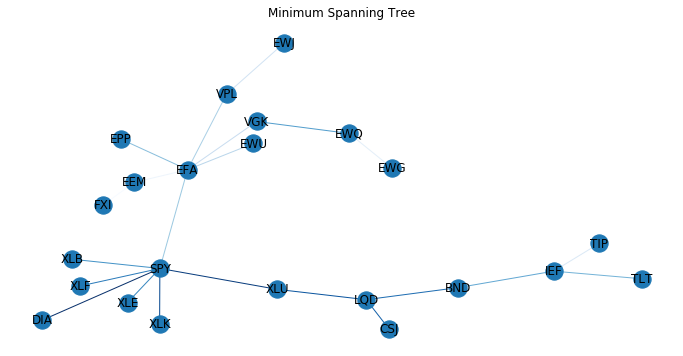

In [25]:
axes = graph.get_graph_plot()

To create interactive visualisations of the graph, we need to create a `DashGraph` object. The `DashGraph` object takes in the `MST` object as input. `DashGraph` will create a mini Flask server, and run Dash.

In [26]:
# Add argument 'jupyter notebook' for running inside jupyter
dash_graph = DashGraph(graph, 'jupyter notebook')

# Get server app
app = dash_graph.get_server()

# Run server - extra argument options 'inline' or 'external' for jupyter notebook
app.run_server(mode='inline')

![image](images/exampleone.png)

## Statistics

Analysing the MST for topological features such as centrality, node and edge strength and normalised tree length, can be used to indicate the state of the market and understand changes over time. For example, properties such as a rising normalized tree length over the last 30 years [[1]](https://www.sciencedirect.com/science/article/pii/S0960077916303344), indicates growing correlation between stock returns. The statistics on the left panel of the UI, can be used for analysing the properties of the MST. 


**Average Node Connectivity**

Average Node Connectivity is defined as "the maximum number of internally disjoint paths connecting" a
given pair of vertices for all pairs in the graph [[3]](https://www.sciencedirect.com/science/article/pii/S0012365X01001807). Two paths u, v are internally disjoint if they don't share a common internal vertex. 

![image](images/internallydisjoint.png)

In the example above, the value is 1, since for an MST there are no loops. However, Average Node Connectivity is useful for understanding the properties of PMFG or other types of graphs.


**Normalised Tree Length**

Normalised Tree Length is positively correlated with stock market returns [[1]](https://www.sciencedirect.com/science/article/pii/S0960077916303344) and negatively correlated with tail risk and return volatility [[1]](https://www.sciencedirect.com/science/article/pii/S0960077916303344). Thus, Normalised Tree Length is perhaps one of the most important statistics to analyse which financial instruments increase market returns but decrease tail risk and return volatility. 

Normalised Tree length at time ${t}$, is the sum of all edges in the distance matrix divided by the number of edges in the MST. It is defined as follows [[4]](https://www.researchgate.net/publication/8952753_Dynamics_of_Market_Correlations_Taxonomy_and_Portfolio_Analysis) :


$${L(t) = \frac{1}{N - 1} \sum_{d^{ij}_t \in T^t} d^{ij}_t}$$

Where ${L(t)}$ is the Normalised Tree length,  ${t}$ is the time at which tree is constructed, ${N-1}$ is the number of edges in the MST and ${D}$ is the distance matrix.



**Average Shortest Path**

The Shortest Path of two nodes i and j is defined as the path which gives the minimum possible sum of the weights of the edges. The average shortest path is the average of the shortest paths for every combination of nodes in the graph. This gives an indication of how closely connected the nodes are in the graph overall. 




**Average Degree Connectivity**

The average degree connectivity is the "average nearest neighbor degree of nodes with degree $k$". The algorithm is essentially the same as the k-nearest neighbours algorithm, and returns a dictionary of degree $k$ and value of the average connectivity. It is defined as [[5]](https://www.pnas.org/content/101/11/3747): 

$$k_{nn,i}^{w} = \frac{1}{s_i} \sum_{j \in N(i)} w_{ij} k_j$$

Where $s_i$ is the weighted degree of node $i$, $w_{ij}$ is the weight of the edge that links $i$ and $j$, and $N(i)$ are the neighbors of node $i$.

**Average Neighbour Degree**

The Average Neighbour Degree calculates the average number of neighbours of each node, weighted by the edge weight value. 


**Betweenness Centrality**

Betweenness Centrality measures the "fraction of the shortest paths passing through a vertex" [[6]](https://www.sciencedirect.com/science/article/pii/B9780123859631000022). In a social network, a node with a high betweenness centrality value suggests the node is playing a "bridge spanning" role [[7]](https://www.sciencedirect.com/science/article/pii/B9780128177563000066).


## Adding Industry Groups (Node Colours)

The recommended way is to categorise the nodes by sector groups such as "technology" or "utilities", where each sector group would be displayed as a different colour. However, you can categorise them as you wish. 

According to Marti et al., the "MST provides a taxonomy which is well compatible with the sector classification provided by an outside institution" [[2]](https://arxiv.org/abs/1703.00485). An example using daily close prices from August 15th 2020 until August 10th 2020 for 13 stocks is shown below. 

In [11]:
# Import desired data
df = pd.read_csv('../Sample-Data/logReturns.csv', index_col=False)

# Create a smaller smaple 
df.drop(df.loc[:, 'T':'TSM'].columns, axis = 1, inplace=True) 
df

,Date,AAPL,MSFT,MS,TWTR,NOK,M,DAL,MU,UAA,VIPS,HL,NVDA,JNJ
0,2017-08-15,0.010888,-0.005040,-0.001721,-0.008739,0.000000,-0.002953,-0.003000,0.014936,-0.032931,-0.003575,-0.029169,-0.008468,-0.000749
1,2017-08-16,-0.004030,0.005856,-0.009087,0.013080,0.004728,-0.007420,0.004198,0.033463,-0.002198,-0.006286,0.025053,-0.011020,0.005905
2,2017-08-17,-0.019385,-0.017118,-0.020198,-0.018109,-0.017447,-0.026158,-0.053259,-0.035487,-0.020562,-0.084557,0.002060,-0.022535,-0.008458
3,2017-08-18,-0.002283,0.001242,0.006631,0.007533,-0.009646,-0.006648,0.000000,0.025335,-0.039513,-0.033902,0.002055,0.000186,-0.003086
4,2017-08-21,-0.001843,-0.004701,-0.015766,0.007477,-0.006483,0.002050,0.005874,-0.027362,-0.031447,-0.061703,0.020326,-0.014658,0.006164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2020-08-04,0.006656,-0.015123,-0.004052,-0.001100,0.007874,0.004906,0.018479,0.017898,0.026532,-0.016733,0.079079,0.019562,-0.000883
748,2020-08-05,0.003618,-0.001642,0.010300,0.012032,-0.019803,0.043103,0.030689,-0.004885,0.066236,0.043447,0.059360,0.005241,0.007983
749,2020-08-06,0.034294,0.015887,-0.006450,0.024169,0.000000,-0.025318,0.022783,-0.047126,-0.045309,0.015609,0.035199,0.004310,-0.005744
750,2020-08-07,-0.024800,-0.018050,0.018037,-0.014700,-0.004008,0.059115,0.003686,0.001026,0.018564,-0.033194,-0.083055,-0.012070,0.007091


By calling `set_node_groups` on class `MST`, we add a dictionary of node group category, with the list of node names of which node belongs to which category. You can also choose to colour a subset of nodes, and the non-coloured nodes will just appear in a default colour.

In [12]:
sector_groups = {
    "technology" : ['NVDA', 'TWTR', 'MSFT', 'NOK', 'AAPL', 'MU'],
    "financial services" : ['MS'],
    "consumer cyclical" : ['M', 'UAA', 'VIPS'],
    "basic materials" : ['HL'],
    "healthcare": ['JNJ'],
    "industrials" : ['DAL']
}

In [13]:
app2 = generate_mst_server(df, jupyter=True, colours=sector_groups)
app2.run_server(mode='inline')

![image](images/exampletwo.png)

The colours correspond to the Industry Groups legend. However, you can add different categories such as instrument type. The legend generates the colours and the matching categories supplied. Colours must be set by calling `set_node_groups` on class `MST` before the `MST` object is passed to the `DashGraph` class. Up to 19 different categories, hand selected colours will be generated. For larger groups of categories, the colours will be generated randomly (see method *_assign_colours_to_groups*). 

## Adding Market Cap (Node Size)
First, we set up the matrix input, and add the colours as we did before.

In [15]:
# Import desired data
df = pd.read_csv('../Sample-Data/logReturns.csv', index_col=False)

# Create a smaller smaple 
df.drop(df.loc[:, 'T':'TSM'].columns, axis = 1, inplace=True) 

# Add colours
sector_groups = {
    "technology" : ['NVDA', 'TWTR', 'MSFT', 'NOK', 'AAPL', 'MU'],
    "financial services" : ['MS'],
    "consumer cyclical" : ['M', 'UAA', 'VIPS'],
    "basic materials" : ['HL'],
    "healthcare": ['JNJ'],
    "industrials" : ['DAL']
}

To add the market cap, we call `set_node_size()` in the `MST` class before passing it to the `Dash Graph`. The market cap is a list corresponding to the index of the original dataframe. The market cap supplied below is measured in billions, at the time of writing (24th August 2020).

In [16]:
# Market Cap list corresponding to indexes of the dataframe
market_caps = [2120, 1612, 80.572, 31.053, 27.749, 1.942, 17.394, 47.395, 4.198, 11.837,
3.072, 313.029, 402.19]

In [17]:
# Retrieve and run server in 'inline' mode (Jupyter notebook mode)
app = generate_mst_server(df, jupyter=True, colours=sector_groups, sizes=market_caps)
app.run_server(mode='inline')

![image](images/examplethree.png)

The sizes are normalised for better visibility and the nodes have a maximum and minimum size, but are sized proportional to the input value. 

## Effect of COVID-19 on MST

Now we can explore the effect of COVID-19 on the MST of 48 stocks. The stock data is based on daily closing prices and retrieved from Yahoo Finance (https://finance.yahoo.com).

The data is split into 3 periods:

1. 9th October 2019 until 18th February 2020 (pre-decline)
2. 18th February until the 24th of March 2020 (decline)
3. 24th March 2020 until 13th August 2020 (post-decline recovery)

In [2]:
# Import desired data
df = pd.read_csv('../Sample-Data/logReturns.csv', index_col=False)
df = df.set_index(df['Date'])
df=df.drop(['Date'],axis=1)
df = df.drop(['FCEL', 'PCG'], axis=1)
df.index = pd.to_datetime(df.index)

pre_decline = df.loc['2019-10-09':'2020-02-18']
decline = df.loc['2020-02-18':'2020-03-24']
post_decline_recovery = df.loc['2020-03-24': '2020-08-10']

![image](images/sp500.png)

In [3]:
pre_decline

,AAPL,MSFT,MS,TWTR,NOK,M,DAL,T,VALE,GE,...,INO,AUY,XOM,TSM,MU,UAA,VIPS,HL,NVDA,JNJ
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-09,0.011652,0.018766,0.015450,-0.005051,0.002039,0.004706,0.013443,-0.011539,0.005415,0.008419,...,0.009756,-0.017291,0.011033,0.016988,0.005613,0.023910,-0.004603,-0.020101,0.019445,-0.020073
2019-10-10,0.013388,0.006202,0.014971,0.001012,0.006091,0.025821,-0.015325,0.009937,0.027521,0.011905,...,0.047402,-0.005831,0.011939,0.005122,0.009285,0.008693,0.014883,0.010101,0.012756,-0.001239
2019-10-11,0.026251,0.004161,0.021211,0.020526,0.016065,0.027081,-0.002829,0.004267,0.033580,0.040585,...,0.009217,-0.044851,0.010639,0.009964,0.041192,0.017664,0.024693,-0.041031,0.016043,0.017436
2019-10-14,-0.001440,-0.000931,0.007603,-0.014475,-0.014042,-0.027081,0.000755,-0.002931,-0.019667,-0.009132,...,-0.023203,0.003053,0.002895,0.009866,-0.005336,0.003994,0.002215,-0.015831,0.002899,-0.004656
2019-10-15,-0.002334,0.014371,0.006605,0.012491,0.012048,0.025171,0.012192,0.011411,-0.012164,0.019308,...,0.050354,-0.024693,0.003463,0.009571,0.035045,0.016309,0.007714,-0.032435,0.051409,0.016088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-11,-0.006052,-0.022834,0.007739,-0.008658,0.034605,0.007978,0.016328,-0.004444,0.027213,-0.004658,...,-0.026202,0.002548,0.009461,0.028356,-0.001396,-0.209183,0.034437,-0.003170,0.018537,0.000856
2020-02-12,0.023470,0.001463,0.007145,0.031477,0.000000,0.038374,0.013714,-0.003412,0.016639,0.023838,...,-0.014859,-0.020566,0.012151,0.016401,0.034676,0.026763,0.046167,-0.079249,0.017209,-0.005939
2020-02-13,-0.007147,-0.005429,-0.004460,0.010007,-0.016000,-0.015412,-0.005734,0.007073,-0.015801,-0.016859,...,0.144696,0.038221,-0.005565,-0.005044,0.001012,-0.016568,-0.034947,0.017036,-0.006479,-0.006641


/Applications/anaconda3/envs/apprent/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



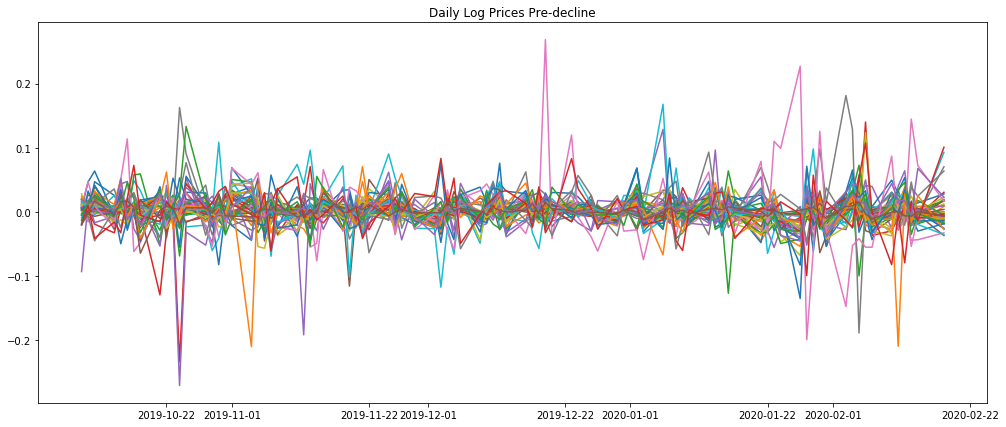

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,7))
plt.plot(pre_decline)
plt.title("Daily Log Prices Pre-decline")
plt.show()

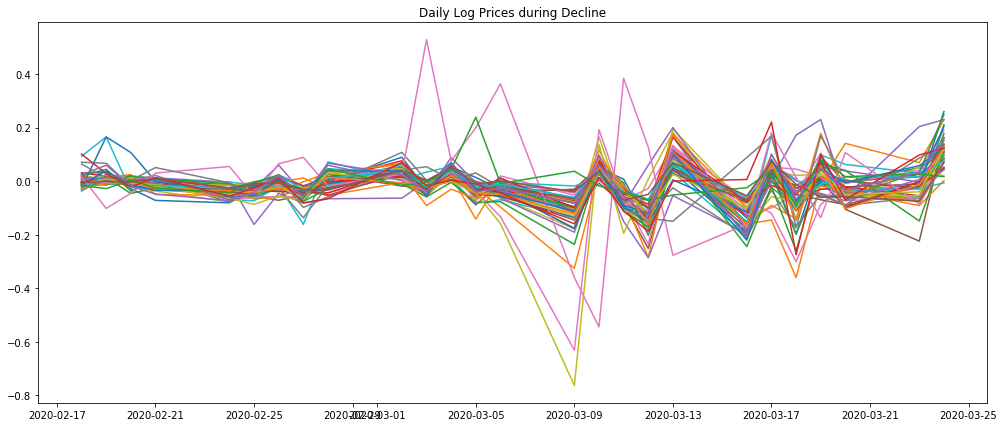

In [5]:
plt.figure(figsize=(17,7))
plt.plot(decline)
plt.title("Daily Log Prices during Decline")
plt.show()

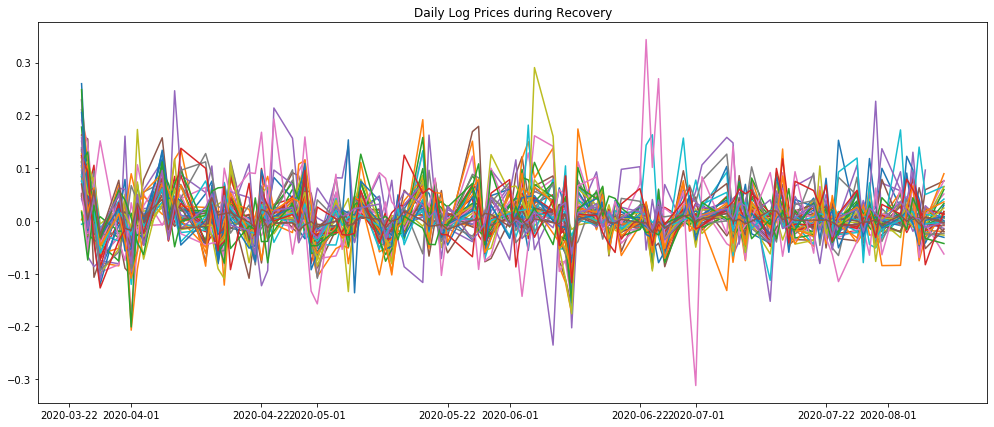

In [6]:
plt.figure(figsize=(17,7))
plt.plot(post_decline_recovery)
plt.title("Daily Log Prices during Recovery")
plt.show()

> **WARNING**: JupyterDash can only run one server in a single port, so if you run a new graph, and then return to a previous graph and interact with it, the latest graph will replace the previous graphs.

### The Pre-Decline Period

In [7]:
sector_groups = {
    "technology" : ['NVDA', 'TWTR', 'MSFT', 'NOK', 'AAPL', 'MU', 'FB', 'CSCO', 'TSM', 'SEDG', 'AMD', 'INFY'],
    "financial services" : ['MS', 'C', 'JPM', 'SCHW'],
    "consumer" : ['M', 'UAA', 'VIPS', 'TSLA', 'BABA', 'KO', 'OSTK', 'F'],
    "real estate" : ['VER'],
    "basic materials" : ['HL', 'FCX', 'AUY', 'VALE', 'AA'],
    "healthcare" : ['JNJ', 'PFE', 'INO', 'EBS'],
    "industrials" : ['DAL', 'GE', 'UAL', 'PLUG'],
    "communication services" : ['T', 'ZNGA', 'DIS', 'VZ'],
    "energy": ['MRO', 'XOM', 'OXY', 'ET']
}

In [8]:
# Retrieve and run server in 'inline' mode (Jupyter notebook mode)
app = generate_mst_server(pre_decline, jupyter=True, colours=sector_groups)
app.run_server(mode='inline')

![image](images/covidone.png)

### The Decline Period

In [9]:
# Retrieve and run server in 'inline' mode (Jupyter notebook mode)
app = generate_mst_server(decline, jupyter=True, colours=sector_groups)
app.run_server(mode='inline')

![image](images/covidtwo.png)

As you can see Facebook (FB) changes from degree 1 in the pre-decline period, to degree 6 during the decline, and back to degree 1 during the post-decline recovery period. JPMorgan Chase (JPM) and MS (Morgan Stanley) become a part of the backbone of the MST during the decline period. Both JPM and MS become a connecting node in the post-decline recovery period, acting as bridges between the major branches in the MST.

The general trend throughout the periods is that the distances between the nodes in the same category decreased during the Decline period, and did not recover to the pre-decline levels. This is the case for example, for the financial sector stocks. Another example is the sector group Energy (in a light pink colour). A similar trend occurs amongst Technology stocks (shown in light purple). 

### The Post-Decline Recovery Period

In [10]:
# Retrieve and run server in 'inline' mode (Jupyter notebook mode)
app = generate_mst_server(post_decline_recovery, jupyter=True, colours=sector_groups)
app.run_server(mode='inline')

![image](images/covidthree.png)

**Distance Matrix Statistics**

|   Statistic Type   | Pre-decline | Decline | Post-decline |
| --- | --- | --- | --- |
| Normalised Tree Length | 0.504  |  0.250 | 0.380 | 
| Average Shortest Path | 6.224  |  5.533 | 6.293 | 



| Degree | Pre-decline | Decline | Post-decline |
| --- | --- | --- | --- |
| 1 | 3.05 | 3.885 | 3.545 |
| 2 | 2.536 | 2.722 | 2.654 |
| 3 | 2.542 | 2.778 | 2.467 |
| 4 | 2.167 | 2.5 | 2.25 |
| 5 | _ | 2.133 | 2.2 |
| 6 | 2.167 | 2.833 | 2.167 |


Both Normalised Tree Length and Average Shortest Path decrease during the Decline period, suggesting a shrinkage of the overall MST. The second table shows the Average Degree Connectivity (rounded to 3 decimal places). Degrees 1, 2, 3, 4 and 6 show a change during decline but returns closer to pre-decline levels. The central node with 6 degrees changes from C (Citigroup) to FB (Facebook) back to C (Citigroup). 

Based on the 48 stocks, it is clear that the Covid-19 related decline has shrunk the MST. The market (based on the above stocks) has become increasingly correlated post-decline compared to pre-decline, despite much of the prices of stocks having recovered to pre-decline levels. The post-decline recovery market has also become more volatile (as shown by the log return figure for this period). Investors' preference for "safer" assets such as technology stocks (perceived as generally more pandemic resilient), was not obvious by looking at the MST.

## Comparing Prim's and Kruskal's 

Based on 1 year's worth of daily data (26th August 2020) for 183 Stocks, we can check the difference between Kruskal's and Prim's. 

In [16]:
distance_matrix_sp = pd.read_csv('../Sample-Data/sp_500_500.csv')
distance_matrix_sp= distance_matrix_sp.set_index(distance_matrix_sp.columns)

distance_matrix_sp

,MMM,ABT,ANF,ACN,ADBE,AMD,AES,AFL,A,APD,...,HES,HPQ,HD,HON,HRL,HST,HUM,HBAN,ITW,IR
MMM,0.000000,0.871726,0.973920,0.816603,1.037288,1.031218,0.980256,0.928061,0.855800,0.840801,...,0.926655,0.893668,0.870731,0.709366,1.095458,0.955073,0.926941,0.837898,0.692120,0.915657
ABT,0.871726,0.000000,1.177882,0.753517,0.873645,0.979993,1.133033,0.995282,0.715809,0.750473,...,1.112697,1.044195,0.878190,0.882003,0.941019,1.149505,0.796768,1.065568,0.835083,1.080033
ANF,0.973920,1.177882,0.000000,1.006389,1.152522,1.179410,0.932814,0.892523,1.066070,1.102207,...,1.033038,0.972223,0.944764,0.856382,1.310907,0.860852,1.050755,0.833377,0.887198,0.882412
ACN,0.816603,0.753517,1.006389,0.000000,0.714611,0.940776,0.810569,0.867362,0.726740,0.698658,...,0.905785,0.806876,0.685533,0.740024,1.019130,0.894858,0.846222,0.811566,0.761097,0.897514
ADBE,1.037288,0.873645,1.152522,0.714611,0.000000,0.852250,0.977831,0.984787,0.816937,0.841844,...,1.074159,1.005867,0.763920,0.978225,1.133272,1.029283,0.923189,1.063227,0.966100,1.050703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HST,0.955073,1.149505,0.860852,0.894858,1.029283,1.128123,0.747305,0.744197,0.971259,0.995668,...,0.950439,0.908386,0.906663,0.799867,1.335677,0.000000,1.000626,0.734488,0.920769,0.808757
HUM,0.926941,0.796768,1.050755,0.846222,0.923189,1.010827,0.974465,0.834141,0.842529,0.940115,...,1.062251,0.955457,0.846248,0.824050,1.169059,1.000626,0.000000,1.019305,0.850926,1.019960
HBAN,0.837898,1.065568,0.833377,0.811566,1.063227,1.126574,0.806409,0.783149,0.876589,0.903886,...,0.786630,0.882396,0.915610,0.676725,1.252042,0.734488,1.019305,0.000000,0.778664,0.800379
ITW,0.692120,0.835083,0.887198,0.761097,0.966100,0.983031,0.892228,0.739658,0.735497,0.780585,...,0.932390,0.919120,0.770838,0.541280,1.044720,0.920769,0.850926,0.778664,0.000000,0.771076


`MST` will by default run Kruskal's if an alogrithm is not specificied as a third argument. Below we can check the running times for both Prim's and Kruskal's. 

In [40]:
%timeit for _ in range(20): generate_mst_server(distance_matrix_sp, mst_algorithm='kruskal')

19.7 s ± 3.31 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
%timeit for _ in range(20): generate_mst_server(distance_matrix_sp, mst_algorithm='prim')

26.9 s ± 4.69 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
%timeit generate_mst_server(distance_matrix_sp, mst_algorithm='kruskal')
%timeit generate_mst_server(distance_matrix_sp, mst_algorithm='prim')

1.51 s ± 326 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.34 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The the time to run the `generate_mst_server` function increased when called in a loop. Running the `MST` constructor repeatedly showed that Prim's was on average around 40ms quicker than Kruskal's per loop. This was consistent with the hypothesis in the work of Huang et al. [[8]](https://ieeexplore.ieee.org/abstract/document/5369459), where Prim's outperforms Kruskal's in Time Complexity when the sample sizes were larger than 100. 

In [18]:
server = generate_mst_server(distance_matrix_sp, jupyter=True, mst_algorithm='prim')
server.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


![image](images/large_example.png)

> **Note**: For larger datasets, the statistics may appear blank while the statistics are loading, as the calls to NetworkX's functions for the statistics can be very slow. However, they will load eventually. This works better in 'external' mode for Jupyter notebook. 

## Conclusion

The notebook gives a step by step example of how to generate an interactive MST. For example, how to add colours based on industry group and add node sizes to indicate market cap. The MST Dash interface allows for interaction with the graphs, as well as different layouts (cose-bilkent, cola and spread) to better view the MST. The notebook reviewed the statistics in the left panel, with an emphasis on Normalised Tree Length statistic, which is correlated with market returns and negatively correlated with tail risk and returns volatility [[1]](https://www.sciencedirect.com/science/article/pii/S0960077916303344). The statistics can be used to analyse the MST and its properties across different market states. 

An analysis of MST's during the Covid-related market decline and recovery was done, by splitting the period into pre-decline, decline and post-decline recovery periods. During the decline, the MST shrunk, as is expected during crises [[2]](https://arxiv.org/abs/1703.00485). Prim's was faster than Kruskal's for a larger dataset of 183 stocks, as expected since the dataset exceeded a 100 nodes [[8]](https://ieeexplore.ieee.org/abstract/document/5369459).

### References

1. Huang, Wei-Qiang, et al. "Dynamic asset trees in the US stock market: Structure variation and market phenomena." Chaos, Solitons & Fractals 94 (2017): 44-53.
2. Marti, Gautier, et al. "A review of two decades of correlations, hierarchies, networks and clustering in financial markets." arXiv preprint arXiv:1703.00485 (2017).
3. Beineke, Lowell W., Ortrud R. Oellermann, and Raymond E. Pippert. "The average connectivity of a graph." Discrete mathematics 252.1-3 (2002): 31-45.
4. Onnela, J-P., et al. "Dynamics of market correlations: Taxonomy and portfolio analysis." Physical Review E 68.5 (2003): 056110.
5. Barrat, Alain, et al. "The architecture of complex weighted networks." Proceedings of the national academy of sciences 101.11 (2004): 3747-3752.
6. Jia, Yuntao, et al. "Edge v. node parallelism for graph centrality metrics." GPU Computing Gems Jade Edition. Morgan Kaufmann, 2012. 15-28.
7. Hansen, Derek, Ben Shneiderman, and Marc A. Smith. Analyzing social media networks with NodeXL: Insights from a connected world. Morgan Kaufmann, 2010.
8. Huang, Feixue, Pengfei Gao, and Yu Wang. "Comparison of Prim and Kruskal on Shanghai and Shenzhen 300 Index hierarchical structure tree." 2009 International Conference on Web Information Systems and Mining. IEEE, 2009.